In [1]:
import pandas as pd
import numpy as np
import statistics
data = pd.read_csv (r'C:\Users\clair\Desktop\DSA EC\Stocks.csv', header=0)   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
df = pd.DataFrame(data, columns= ['Monthly Returns_BABA','Monthly Returns_BTC','Monthly Returns_VTI','Monthly Returns_HAL','Monthly Returns_GGE','Monthly Returns_AMZN'])
print(df.head(3))

returns_array = df.to_numpy()

R_mean=np.zeros(6)
#for index in range(6):
returns_array2=np.zeros((92,6))

nan_array= np.isnan(returns_array)    
not_nan_array = ~ nan_array
for index in range(6):
    returns_array2[:,index] = returns_array[not_nan_array[:,index]][:,index]
    
    R_mean[index]=statistics.mean(returns_array2[:,index])
print(R_mean)
#print(df.head(0))
print(returns_array2.shape)

#find mean returns for each stock


   Monthly Returns_BABA  Monthly Returns_BTC  Monthly Returns_VTI  \
0              0.117421             0.108623             0.024803   
1             -0.153034            -0.083540            -0.005628   
2             -0.320835             0.142355            -0.027359   

   Monthly Returns_HAL  Monthly Returns_GGE  Monthly Returns_AMZN  
0            -0.234675            -0.002597              0.108623  
1            -0.068009             0.117188             -0.083540  
2             0.016781            -0.177156              0.142355  
[ 0.06996735  0.02526649  0.00757911  0.00561031 -0.00224196  0.02526649]
(92, 6)


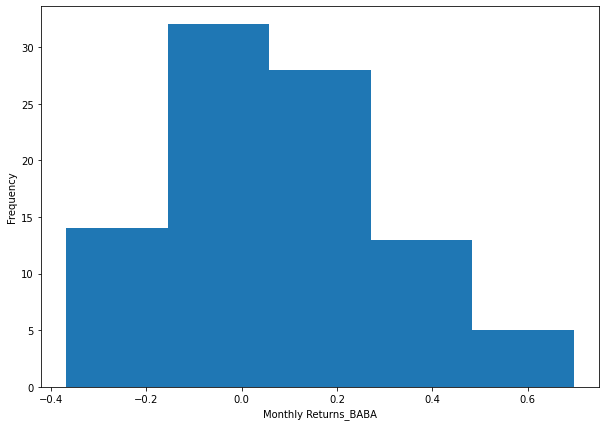

In [2]:
from matplotlib import pyplot as plt
import numpy as np

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))

ax.hist(returns_array[:,0], bins = 5)
plt.xlabel("Monthly Returns_BABA")
plt.ylabel("Frequency")
 
# Show plot
plt.show()

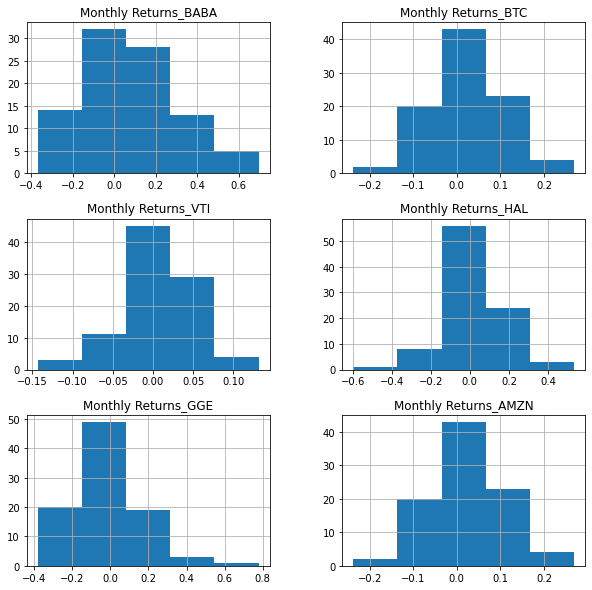

In [3]:
df.hist(bins=5, figsize=(10,10))
plt.savefig('R_hist.png')

[0.05383773 0.00758159 0.00199257 0.02121161 0.03441831 0.00758159]


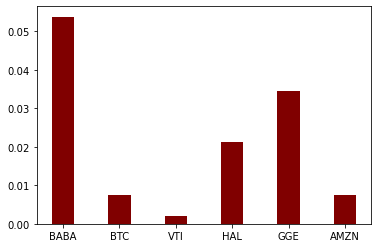

<Figure size 432x288 with 0 Axes>

In [4]:
#variances and covariances of each stocks
import numpy as np
import statistics
from matplotlib import pyplot as plt

variances=np.zeros(6)
covarances=np.zeros(6)
for j in range(6):
    variances[j]=statistics.variance(returns_array2[:,j])
    covarances=np.cov(returns_array2[:,0],returns_array2[:,0])[0,1]  
covariances_M=np.cov(returns_array2.T)
limit_float = np.round(covariances_M, 3)
#print(returns_array2.T)
print(variances.T)

y=['BABA','BTC','VTI','HAL','GGE','AMZN']

fig = plt.figure()
plt.bar(y,variances.T, color ='maroon',
        width = 0.4)
plt.show()
plt.savefig('Var_hist.png')

In [5]:
# find betas and alfas for 30 combination of the stocks
beta=np.zeros((6,6)) # beta is th proportation for stock2
alfa=np.zeros((6,6)) #alfa is the proprotion for stock1
print(beta)
for k in range(6):
    for l in range(1,6):
        beta[k,l]=(variances[k]**2-covariances_M[k,l])/(variances[l]**2+variances[k]**2-2*covariances_M[k,l])
        alfa[k,l]=(variances[l]**2-covariances_M[k,l])/(variances[k]**2+variances[l]**2-2*covariances_M[k,l])
    
        #beta=(variances[0]**2-covariances_M[0,1])/(variances[1]**2+variances[0]**2-2*covariances_M[0,1])
print(beta)
print(alfa)
import pandas as pd

#f = pd.DataFrame(alfa)
#f.to_csv('myfile.csv')

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[0.         0.23576175 0.1528859  0.34975867 0.29374539 0.23576175]
 [0.         0.5        0.49430685 0.53224789 0.57019098 0.5       ]
 [0.         0.50569315 0.5        0.52874171 0.6224515  0.50569315]
 [0.         0.46775211 0.47125829 0.5        0.52771688 0.46775211]
 [0.         0.42980902 0.3775485  0.47228312 0.5        0.42980902]
 [0.         0.5        0.49430685 0.53224789 0.57019098 0.5       ]]
[[0.         0.76423825 0.8471141  0.65024133 0.70625461 0.76423825]
 [0.         0.5        0.50569315 0.46775211 0.42980902 0.5       ]
 [0.         0.49430685 0.5        0.47125829 0.3775485  0.49430685]
 [0.         0.53224789 0.52874171 0.5        0.47228312 0.53224789]
 [0.         0.57019098 0.6224515  0.52771688 0.5        0.57019098]
 [0.         0.5        0.50569315 0.46775211 0.42980902 0.5       ]]


[[ 0.059  0.06   0.047  0.049  0.059]
 [ 0.025  0.017  0.015  0.01   0.025]
 [ 0.017  0.008  0.007  0.001  0.017]
 [ 0.015  0.007  0.006  0.001  0.015]
 [ 0.01   0.001  0.001 -0.002  0.01 ]
 [ 0.025  0.017  0.015  0.01   0.025]]
     BTC    VTI    HAL    GGE   AMZN
0  0.059  0.060  0.047  0.049  0.059
1    NaN  0.017  0.015  0.010  0.025
2    NaN    NaN  0.007  0.001  0.017


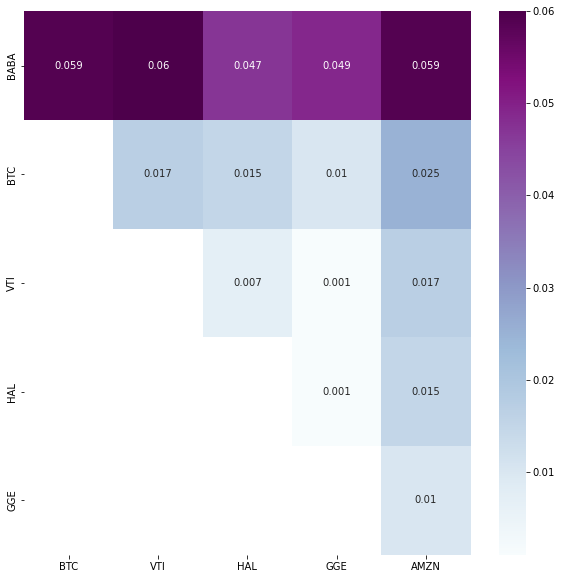

In [6]:
#find profolio returns and protoflio variances, and standard deivation for 30 combinaiton of the stocks
import math
R_prof=np.zeros((6,5))
Van_prof=np.zeros((6,5))
SD=np.zeros((6,5))
for a in range(6):
    for b in range(1,6):
        R_prof[a,b-1]=alfa[a,b]*R_mean[a]+beta[a,b]*R_mean[b]
        Van_prof[a,b-1]=alfa[a,b]**2*variances[a]+beta[a,b]**2*variances[b]+2*alfa[a,b]*beta[a,b]*covariances_M[a,b]
        SD[a,b-1]=math.sqrt(Van_prof[a,b-1])

print(np.around(R_prof,3))
#print(np.around(Van_prof,3))
#print(np.around(SD,3))  


g = pd.DataFrame(R_prof)
g.to_csv('myfile.csv')

import seaborn as sns
import matplotlib.pyplot as plt

Xlabs = ['BTC','VTI','HAL','GGE','AMZN']
Ylabs = ['BABA','BTC','VTI','HAL','GGE']

#sns.heatmap(np.around(Van_prof,3), annot=True, fmt='g', xticklabels=Xlabs, yticklabels=Ylabs,vmin=0, vmax=0.04)
#plt.show()


import pandas as pd
import numpy as np

data = pd.read_csv (r'C:\Users\clair\Desktop\DSA EC\2R.csv', header=0)   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
df = pd.DataFrame(data, columns= ['BTC','VTI','HAL','GGE','AMZN'])
print(df.head(3))
plt.figure(figsize=(10,10))
sns.heatmap(np.around(df,3), annot=True, fmt='g',cmap="BuPu",
             yticklabels=Ylabs) #vmin=0, vmax=0.04)

plt.savefig('R_prof_2.png')

In [19]:
# import sympy as sym
# from sympy import *
# a = sym.Symbol('a')
# b = sym.Symbol('b')
# g = sym.Symbol('g')
# sig1 = sym.Symbol('sig1')
# sig2 = sym.Symbol('sig2')
# sig3 = sym.Symbol('sig3')
# sig12 = sym.Symbol('sig12')
# sig13 = sym.Symbol('sig13')
# sig23 = sym.Symbol('sig23')

# eqn1= 2*a*sig1**2-2*(1-g-a)*sig2**2+2*(1-g-a)*sig12-2*a*sig12+2*g*sig13-2*g*sig23
# eqn2=2*(1-g-a)*sig2**2-2*g*sig3**2+2*a*sig12-2*a*sig13+2*g*sig23-2*(1-g-a)*sig23

# solution = sym.solve((eqn1, eqn2), (a, g))
# #print(solution[a])

# a=sym.simplify(solution[a])
# g=sym.simplify(solution[g])
# eqn3=2*a*sig1**2-2*b*sig2**2+2*b*sig12-2*a*sig12+2*g*sig13-2*g*sig23
# soln=sym.solve(eqn3, b)
# print(sym.simplify(soln[0]))


(-sig1**2*sig23 + sig1**2*sig3**2 + sig12*sig13 - sig12*sig3**2 - sig13**2 + sig13*sig23)/(sig1**2*sig2**2 - 2*sig1**2*sig23 + sig1**2*sig3**2 - sig12**2 + 2*sig12*sig13 + 2*sig12*sig23 - 2*sig12*sig3**2 - sig13**2 - 2*sig13*sig2**2 + 2*sig13*sig23 + sig2**2*sig3**2 - sig23**2)


In [19]:
import sympy as sym
from sympy import *
a = sym.Symbol('a')
b = sym.Symbol('b')
g = sym.Symbol('g')

alfa3=np.zeros((6,5,4))
beta3=np.zeros((6,5,4)) 
gama3=np.zeros((6,5,4))

for k in range(6):
    for l in range(1,6):
        for m in range (2,6):
            eqn1= a*variances[k]**2-(1-g-a)*variances[l]**2+covariances_M[k,l]*(1-2*a-g)+g*(covariances_M[k,m]-covariances_M[k,m])
            eqn2=(1-g-a)*variances[l]**2-g*variances[m]**2+a*(covariances_M[k,l]-covariances_M[k,m])+covariances_M[l,m]*(2*g+a-1)
        
            S = sym.solve((eqn1, eqn2), (a, g))
            #print(float(S[a]))
            alfa3[k,l-1,m-2]=sym.simplify(float(S[a]))
            gama3[k,l-1,m-2]=sym.simplify(float(S[g]))
            
            eqn3=alfa3[k,l-1,m-2]*variances[k]**2-b*variances[l]**2+covariances_M[k,l]*(b-alfa3[k,l-1,m-2])+gama3[k,l-1,m-2]*(covariances_M[k,m]-covariances_M[l,m])
            soln=sym.solve(eqn3, b)
            #print(soln[0])
            beta3[k,l-1,m-2]=sym.simplify(float(soln[0]))
            
        

print(alfa3)
# print(gama3)
import pandas as pd

# f = pd.DataFrame(alfa3)
# f.to_csv('myfile.csv')

[[[ 0.74351999  0.45134841  0.58680983  0.61843495]
  [ 0.73477705  0.50297405  0.55606985  0.61113277]
  [ 0.67663738  0.48174637  0.53232269  0.65706432]
  [ 0.67846584  0.49476623  0.54589923  0.57481123]
  [ 0.74351999  0.45134841  0.58680983  0.61843495]]

 [[ 1.2675221   0.61265475  0.40437595  0.33333333]
  [ 0.33841319  0.30078303  0.20712424  0.19170164]
  [ 0.34143279  0.30527183  0.27599038  0.22416096]
  [ 0.42020999  0.30099026  0.27373041  0.25188228]
  [ 1.2675221   0.61265475  0.40437595  0.33333333]]

 [[ 0.34967396  0.26361745  0.28081208  0.32829189]
  [ 0.33333333  0.27026739  0.23782533  0.31347738]
  [ 0.38361755  0.30826548  0.31252829  0.38831673]
  [ 0.30199043  0.23355723  0.23270249  0.26630648]
  [ 0.34967396  0.26361745  0.28081208  0.32829189]]

 [[ 0.32482037  0.10901255  0.23548179  0.36262791]
  [ 0.35938061  0.13210089  0.19250564  0.40741802]
  [-0.78201273  0.33333333  1.08949664 -0.37694985]
  [ 0.59426936  0.19662414  0.30914309  0.48694096]
  [ 0.

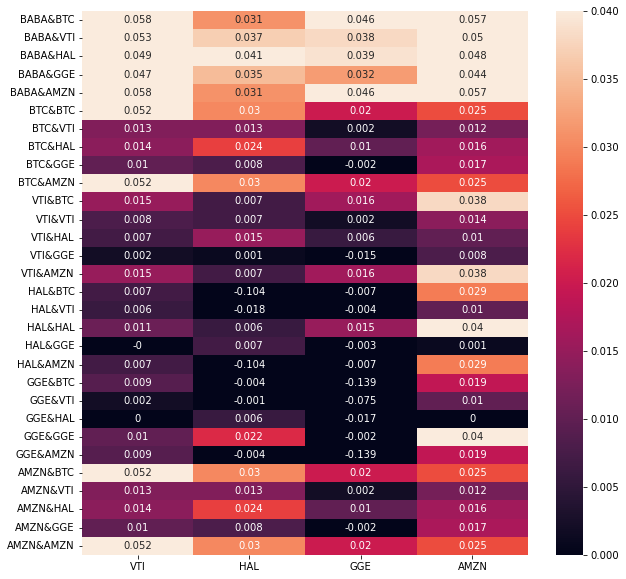

In [20]:
import math
R_prof3=np.zeros((6,5,4))
Van_prof3=np.zeros((6,5,4))
SD3=np.zeros((6,5,4))
for k in range(6):
    for l in range(1,6):
        for m in range(2,6):
            R_prof3[k,l-1,m-2]=alfa3[k,l-1, m-2]*R_mean[k]+beta3[k,l-1,m-2]*R_mean[l]+gama3[k,l-1,m-2]*R_mean[m]
            Van_prof3[k,l-1,m-2]=alfa3[k,l-1, m-2]**2*variances[k]+beta3[k,l-1, m-2]**2*variances[l]+gama3[k,l-1, m-2]**2*variances[m]+2*alfa3[k,l-1, m-2]*beta3[k,l-1, m-2]*covariances_M[k,l]+2*gama3[k,l-1, m-2]*beta3[k,l-1, m-2]*covariances_M[l,m]+2*alfa3[k,l-1, m-2]*gama3[k,l-1, m-2]*covariances_M[k,m]
            SD3[k,l-1, m-2]=math.sqrt(Van_prof3[k,l-1, m-2])
R_prof3.resize(30,4)
Van_prof3.resize(30,4)
#v=pd.DataFrame(R_prof3)
#print(np.around(R_prof3,3))

import seaborn as sns
import matplotlib.pyplot as plt

Xlabs = ['VTI','HAL','GGE','AMZN']
Ylabs = ['BABA&BTC','BABA&VTI','BABA&HAL','BABA&GGE','BABA&AMZN','BTC&BTC','BTC&VTI','BTC&HAL','BTC&GGE','BTC&AMZN','VTI&BTC','VTI&VTI','VTI&HAL','VTI&GGE','VTI&AMZN','HAL&BTC','HAL&VTI','HAL&HAL','HAL&GGE','HAL&AMZN','GGE&BTC','GGE&VTI','GGE&HAL','GGE&GGE','GGE&AMZN','AMZN&BTC','AMZN&VTI','AMZN&HAL','AMZN&GGE','AMZN&AMZN']

fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(np.around(R_prof3,3), annot=True, fmt='g', xticklabels=Xlabs, yticklabels=Ylabs,vmin=0, vmax=0.04)

#plt.savefig('my_plot.png')
import pandas as pd

f = pd.DataFrame(R_prof3)
#f.to_csv('myfile.csv')




     VTI    HAL    GGE   AMZN
0  0.058  0.031  0.046  0.057
1    NaN  0.037  0.038  0.050
2    NaN    NaN  0.039  0.048


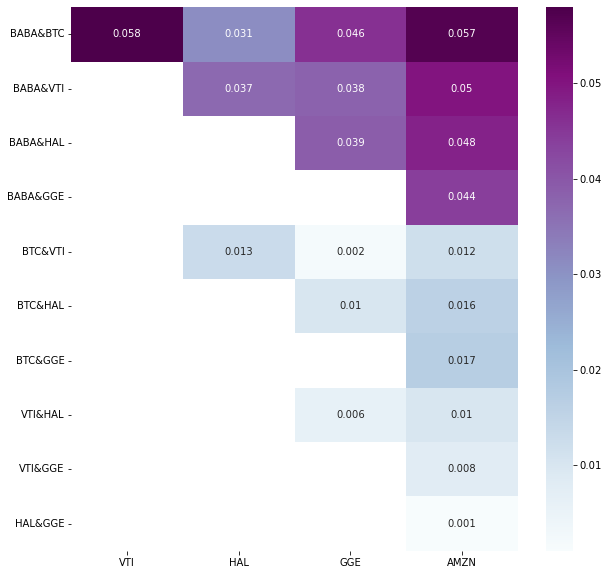

In [26]:
import pandas as pd
import numpy as np
import statistics
data = pd.read_csv (r'C:\Users\clair\Desktop\DSA EC\3stockvarances_real.csv', header=0)   #read the csv file (put 'r' before the path string to address any special characters in the path, such as '\'). Don't forget to put the file name at the end of the path + ".csv"
df = pd.DataFrame(data, columns= ['VTI','HAL','GGE','AMZN'])
print(df.head(3))


Ylabs = ['BABA&BTC','BABA&VTI','BABA&HAL','BABA&GGE','BTC&VTI','BTC&HAL','BTC&GGE','VTI&HAL','VTI&GGE','HAL&GGE']

plt.figure(figsize=(10,10))
sns.heatmap(np.around(df,3), annot=True, fmt='g',cmap="BuPu",
             yticklabels=Ylabs) #vmin=0, vmax=0.04
            
plt.savefig("R_prof_3", dpi=100)
